In [1]:
import torch
import torch_directml as dml
from ResNet_withBottleneck import ResNet


In [2]:
device_dml = dml.device()
device_dml

device(type='privateuseone', index=0)

In [3]:
device_cpu = torch.device('cpu')
device_cpu

device(type='cpu')

In [11]:
model_cpu = ResNet(
            num_classes=5,
            input_size=(64, 64),
            channel_size=3,
            layers=[1, 1, 1, 1], #[1, 1, 1, 1],#[2, 2, 2, 2],
            out_channels=[64, 128, 256, 512],
            blocktype="simple",
            device=device_cpu
        )
#model_cpu.to(device_cpu)

In [12]:
model_cpu.load_state_dict(torch.load(r"C:\Users\Magnus\OneDrive\Studium\3. Semester WS2324\Praktikum BV\TrafficLightDetection\StateDetection\models\_model_best4\model.pth", map_location=device_cpu))
model_cpu.device

device(type='cpu')

In [13]:
model_dml = ResNet(
            num_classes=5,
            input_size=(64, 64),
            channel_size=3,
            layers=[1, 1, 1, 1], #[1, 1, 1, 1],#[2, 2, 2, 2],
            out_channels=[64, 128, 256, 512],
            blocktype="simple",
            device=device_dml
        )


In [19]:

# copy the weights from the CPU model to the DML model
for name, param in model_cpu.named_parameters():
    if name in model_dml.state_dict().keys():
        model_dml.state_dict()[name].copy_(param)

        

model_dml.to(device_dml)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): SimpleBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU()
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (layer2): Sequential(
    (0): SimpleBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1

In [20]:
model_dml.device

device(type='privateuseone', index=0)

In [21]:
# save the dml model 

torch.save(model_dml.state_dict(), r"C:\Users\Magnus\OneDrive\Studium\3. Semester WS2324\Praktikum BV\TrafficLightDetection\StateDetection\models\_model_best4\model_dml.pth")

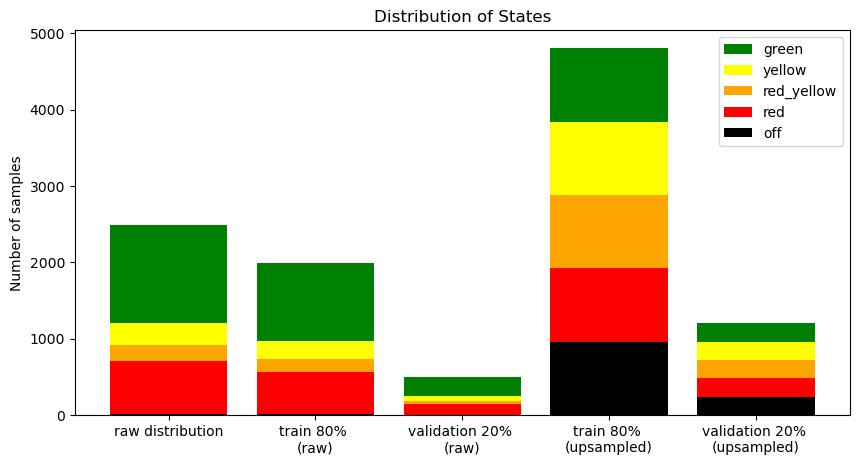

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Original Distribution:
# off 12
# red 697
# red_yellow 211
# yellow 288
# green 1286

# Distribution BEFORE keeping max_keep samples per class: 
# Train set:
# off 9
# red 557
# red_yellow 168
# yellow 230
# green 1028

# Validation set:
# off 3
# red 140
# red_yellow 43
# yellow 58
# green 258

# Distribution AFTER keeping max_keep samples per class: 
# Train set:
# off 960
# red 960
# red_yellow 960
# yellow 960
# green 960

# Validation set:
# off 240
# red 240
# red_yellow 240
# yellow 240
# green 240

# Train dataset shape:  (4800, 128, 128, 3)
# Val dataset shape:  (1200, 128, 128, 3)

original_distribution = [12, 697, 211, 288, 1286]
before_distribution_train = [9, 557, 168, 230, 1028]
before_distribution_val = [3, 140, 43, 58, 258]
after_distribution_train = [960, 960, 960, 960, 960]
after_distribution_val = [240, 240, 240, 240, 240]

off = [12, 9, 3, 960, 240]
red = [697, 557, 140, 960, 240]
red_yellow = [211, 168, 43, 960, 240]
yellow = [288, 230, 58, 960, 240]
green = [1286, 1028, 258, 960, 240]

dists = ["raw distribution", "train 80% \n(raw)", "validation 20% \n(raw)", "train 80% \n(upsampled)", "validation 20% \n(upsampled)"]

labels = ['off', 'red', 'red_yellow', 'yellow', 'green']

# Original Distribution
# on the x axis are the 5 different distributions as bars "original_distribution", "before_distribution_train", "before_distribution_val", "after_distribution_train", "after_distribution_val"

# and on the y axis number of samples stacked for each class, each class colored by the labels
fig, ax = plt.subplots() 
fig.set_size_inches(10, 5)

ax.bar(dists, off, label='off', color='black')
ax.bar(dists, red, bottom=off, label='red', color='red')
ax.bar(dists, red_yellow, bottom=np.array(off)+np.array(red), label='red_yellow', color='orange')
ax.bar(dists, yellow, bottom=np.array(off)+np.array(red)+np.array(red_yellow), label='yellow', color='yellow')
ax.bar(dists, green, bottom=np.array(off)+np.array(red)+np.array(red_yellow)+np.array(yellow), label='green', color='green')
ax.set_ylabel('Number of samples')
ax.set_title('Distribution of States')
# flip the order of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])


plt.show()
